In [23]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import glob
import seaborn as sns

In [24]:
def ConvertCV(foldperf):
    testl_f = np.zeros((5,100))
    tl_f= np.zeros((5,100))
    testa_f= np.zeros((5,100))
    ta_f= np.zeros((5,100))
    k=5
    for f in range(1,k+1):
        tl_f[f-1,:] = foldperf['fold{}'.format(f)]['train_loss']
        ta_f[f-1,:] = foldperf['fold{}'.format(f)]['train_acc']
        testl_f[f-1,:]=foldperf['fold{}'.format(f)]['test_loss']
        testa_f[f-1,:]=foldperf['fold{}'.format(f)]['test_acc']
    cv_test_l = np.mean(testl_f,axis=0) 
    cv_test_ac = np.mean(testa_f,axis=0) 
    cv_train_l = np.mean(tl_f,axis=0) 
    cv_train_ac = np.mean(ta_f,axis=0) 
    return cv_train_l, cv_test_l, cv_train_ac, cv_test_ac

In [25]:
#a_file = open("/Users/jiayihan/Documents/ResultsThesis/GridSearchCV5Fold_/Adadelta_0.01.pkl", "rb")
#output= pickle.load(a_file)
#cv_train_l, cv_test_l, cv_train_ac, cv_test_ac = ConvertCV(output) 
#plt.plot(cv_train_l)
#plt.plot(cv_test_l)

In [58]:
def CreateList(name):
    LearningRates = glob.glob("/Users/jiayihan/Documents/ParamSearch/raw/GridSearchCV5Fold_/*"+name+"*.pkl")
    training_loss = []
    test_loss = [] 
    for path in LearningRates:
        a_file = open(path, "rb")
        foldperf= pickle.load(a_file)
        cv_train_l, cv_test_l, _, _ = ConvertCV(foldperf) 
        training_loss.append(cv_train_l)
        test_loss.append(cv_test_l)
    return training_loss, test_loss

allNames_train = []
allNames_test = []
for name in ['Adadelta','RMSprop','SGD','Adam']:
    train, test = CreateList(name)
    allNames_train.append(train)
    allNames_test.append(test)

In [80]:
def DropCreateList(name):
    LearningRates = glob.glob("/Users/jiayihan/Documents/ParamSearch/raw/GridSearchCV5Fold_/drop/*"+name+"*.pkl")
    training_loss = []
    test_loss = [] 
    for path in LearningRates:
        a_file = open(path, "rb")
        foldperf= pickle.load(a_file)
        cv_train_l, cv_test_l, _, _ = ConvertCV(foldperf) 
        training_loss.append(cv_train_l)
        test_loss.append(cv_test_l)
    return training_loss, test_loss

In [84]:
## the overall
alltrain, alltest = CreateList('')
alltrainNo, alltestNo = DropCreateList('')

In [85]:
alltrain=np.array(alltrain).flatten()      
alltest=np.array(alltest).flatten()
alltrainNo=np.array(alltrainNo).flatten()      
alltestNo=np.array(alltestNo).flatten()    

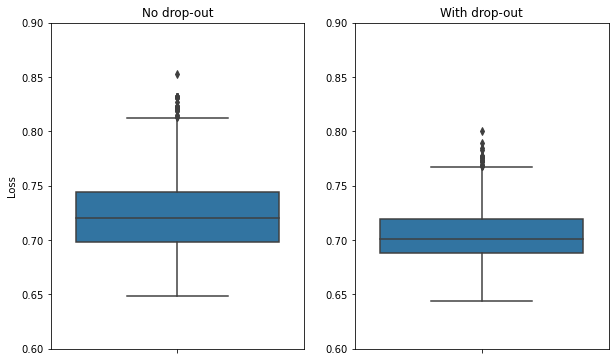

In [92]:
fig=plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
ax = sns.boxplot(y=alltest)
ax.set(ylim=(0.6, 0.9))
ax.set_ylabel('Loss')
ax.set_title('No drop-out')

plt.subplot(1,2,2)
ax = sns.boxplot(y=alltestNo)
ax.set(ylim=(0.6, 0.9))
ax.set_title('With drop-out')
fig.savefig('/Users/jiayihan/OneDrive - Danmarks Tekniske Universitet/Thesis/Thesis_figures/Dropout.png')

In [89]:
print(np.min(alltestNo))

0.6436268593558021


In [91]:
print(np.min(alltest))

0.6481944898428665


In [65]:
Adadelta_ = np.array(allNames_train[0])
Adadelta_.flatten()

RMSprop_ = np.array(allNames_train[1])
RMSprop_.flatten()                 
                     
SGD_ = np.array(allNames_train[2])
SGD_.flatten()     

Adam_ = np.array(allNames_train[3])
Adam_.flatten()    

array([0.68918031, 0.6876059 , 0.68677589, 0.68635364, 0.68380456,
       0.6743671 , 0.65802701, 0.65078124, 0.63682432, 0.62815399,
       0.61684995, 0.60322989, 0.59671872, 0.58147497, 0.57443433,
       0.56791628, 0.56661048, 0.55397055, 0.56358282, 0.54839698,
       0.53870287, 0.53858375, 0.52636075, 0.52484617, 0.52696941,
       0.51341526, 0.51169366, 0.50057771, 0.509465  , 0.4976679 ,
       0.49062844, 0.54587027, 0.56089475, 0.54695708, 0.55137783,
       0.5434372 , 0.53782658, 0.53521801, 0.52142293, 0.49284762,
       0.49495879, 0.48964543, 0.46850878, 0.46445786, 0.4733048 ,
       0.47000938, 0.48246068, 0.47668209, 0.46324839, 0.45879678,
       0.45432079, 0.45759903, 0.46148475, 0.45411798, 0.4582163 ,
       0.44573966, 0.4434559 , 0.47303671, 0.45342809, 0.44227685,
       0.45236345, 0.4426928 , 0.45759593, 0.43547146, 0.43560387,
       0.43479385, 0.44981327, 0.44312926, 0.43751128, 0.42908233,
       0.43575633, 0.43737171, 0.43526332, 0.43116166, 0.42124

In [66]:
Adadelta_t = np.array(allNames_test[0])
Adadelta_t.flatten()

RMSprop_t= np.array(allNames_test[1])
RMSprop_t.flatten()                 
                     
SGD_t = np.array(allNames_test[2])
SGD_t.flatten()          

Adam_t = np.array(allNames_test[3])
Adam_t.flatten()    

array([0.68514862, 0.69158997, 0.68958277, 0.68300289, 0.68385436,
       0.67937308, 0.67356244, 0.6726197 , 0.66499181, 0.67144156,
       0.67614584, 0.67399082, 0.68528789, 0.67794359, 0.69916068,
       0.71056233, 0.71726681, 0.71719904, 0.70754005, 0.69309013,
       0.6840942 , 0.69774968, 0.70518487, 0.69100094, 0.69219874,
       0.69967501, 0.68714703, 0.68931793, 0.68415545, 0.68720516,
       0.69011381, 0.70067442, 0.70054218, 0.70136569, 0.71120438,
       0.69904073, 0.70287599, 0.70430175, 0.70340188, 0.6933499 ,
       0.70346559, 0.68936922, 0.70330403, 0.68856676, 0.69444533,
       0.69272377, 0.69733393, 0.70478361, 0.70308112, 0.68614569,
       0.70689701, 0.68971241, 0.69754247, 0.71406026, 0.69797111,
       0.70789043, 0.71144809, 0.69582686, 0.715731  , 0.71268308,
       0.69320319, 0.71173789, 0.69586914, 0.70001226, 0.70259931,
       0.69931373, 0.70703277, 0.71002336, 0.69987605, 0.70243362,
       0.70403099, 0.71039294, 0.70944781, 0.69697934, 0.71135

Text(0.5, 1.0, 'Adam')

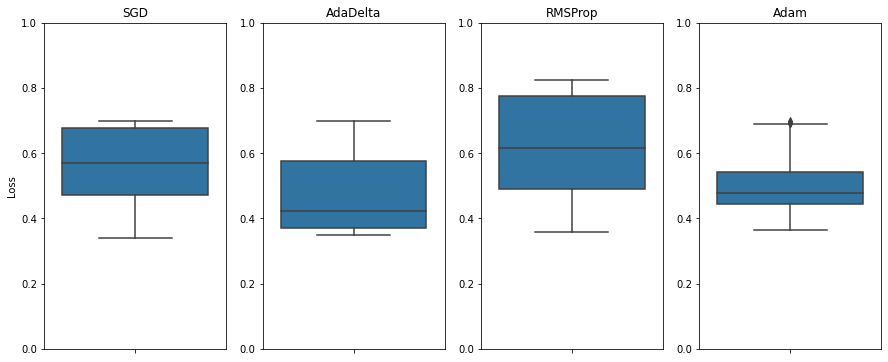

In [67]:
fig=plt.figure(figsize=(15,6))
plt.subplot(1,4,1)

ax = sns.boxplot(y=SGD_)
ax.set(ylim=(0, 1))
ax.set_title('SGD')
ax.set_ylabel('Loss')

plt.subplot(1,4,2)
ax = sns.boxplot(y=Adadelta_)
ax.set(ylim=(0, 1))
ax.set_title('AdaDelta')

plt.subplot(1,4,3)
ax = sns.boxplot(y=RMSprop_)
ax.set(ylim=(0, 1))
ax.set_title('RMSProp')

plt.subplot(1,4,4)
ax = sns.boxplot(y=Adam_)
ax.set(ylim=(0, 1))
ax.set_title('Adam')



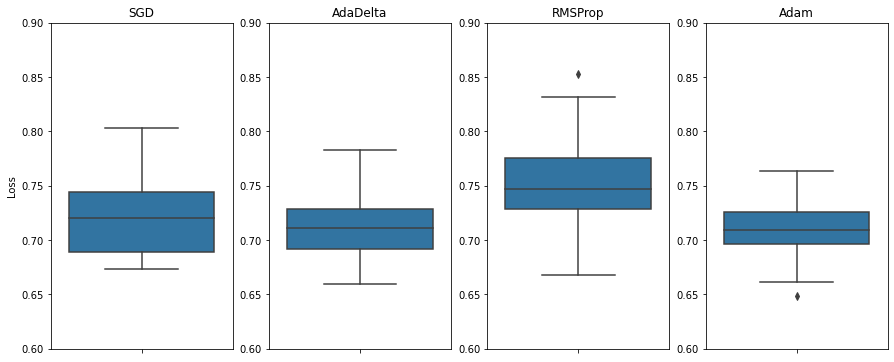

In [93]:
fig=plt.figure(figsize=(15,6))

plt.subplot(1,4,1)
ax = sns.boxplot(y=SGD_t)
ax.set(ylim=(0.6, 0.9))
ax.set_title('SGD')
ax.set_ylabel('Loss')

plt.subplot(1,4,2)
ax = sns.boxplot(y=Adadelta_t)
ax.set(ylim=(0.6, 0.9))
ax.set_title('AdaDelta')

plt.subplot(1,4,3)
ax = sns.boxplot(y=RMSprop_t)
ax.set_title('RMSProp')
ax.set(ylim=(0.6, 0.9))

plt.subplot(1,4,4)
ax = sns.boxplot(y=Adam_t)
ax.set(ylim=(0.6, 0.9))
ax.set_title('Adam')

fig.savefig('/Users/jiayihan/OneDrive - Danmarks Tekniske Universitet/Thesis/Thesis_figures/Optimizer.png')